In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [3]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'.'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/jcaputi/CAMB/camb


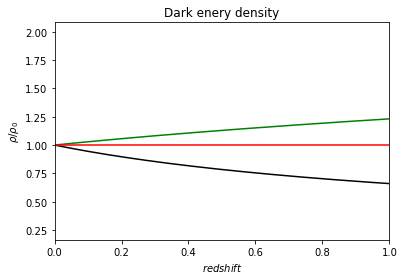

In [4]:
from camb.dark_energy import DarkEnergyModel

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965)

pars.DarkEnergy = DarkEnergyModel(w=-1.2, wa=0.0)
results = camb.get_background(pars)

pars.DarkEnergy = DarkEnergyModel(w=-0.9, wa=0.0)
results2 = camb.get_background(pars)

pars.DarkEnergy = DarkEnergyModel(w=-1.0, wa=0.0)
results3 = camb.get_background(pars)

a = np.logspace(-1, -0.001, 1000)
z = 1.0/(a) - 1.0

rho, _ = results.get_dark_energy_rho_w(a)
rho2, _ = results2.get_dark_energy_rho_w(a)
rho3, _ = results3.get_dark_energy_rho_w(a)

plt.plot(z, rho, color='k')
plt.plot(z, rho2, color='g')
plt.plot(z, rho3, color='r')
plt.ylabel(r'$\rho/\rho_0$')
plt.xlabel('$redshift$')
plt.xlim(0,1)
plt.title('Dark enery density');

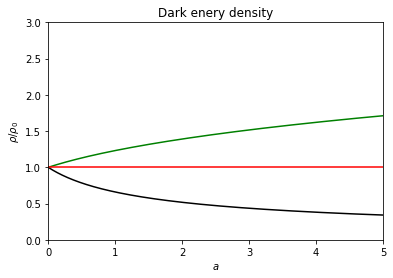

In [5]:
plt.plot(z, rho, color='k')
plt.plot(z, rho2, color='g')
plt.plot(z, rho3, color='r')
plt.ylabel(r'$\rho/\rho_0$')
plt.xlabel('$a$')
plt.xlim(0,5)
plt.ylim(0,3)
plt.title('Dark enery density');

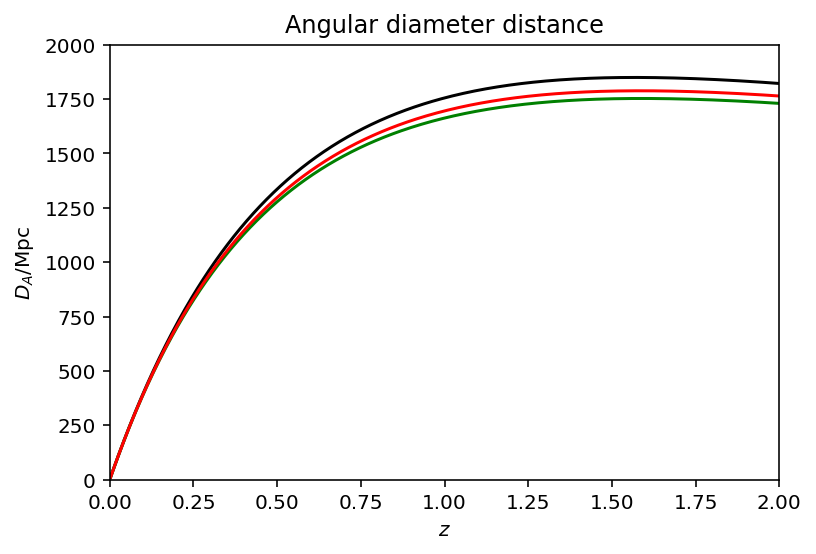

In [60]:
DA = results.angular_diameter_distance(z)
DA2 = results2.angular_diameter_distance(z)
DA3 = results3.angular_diameter_distance(z)
plt.plot(z, DA, color='k')
plt.plot(z, DA2, color='g')
plt.plot(z, DA3, color='r')
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000])
plt.xlim([0,2]);

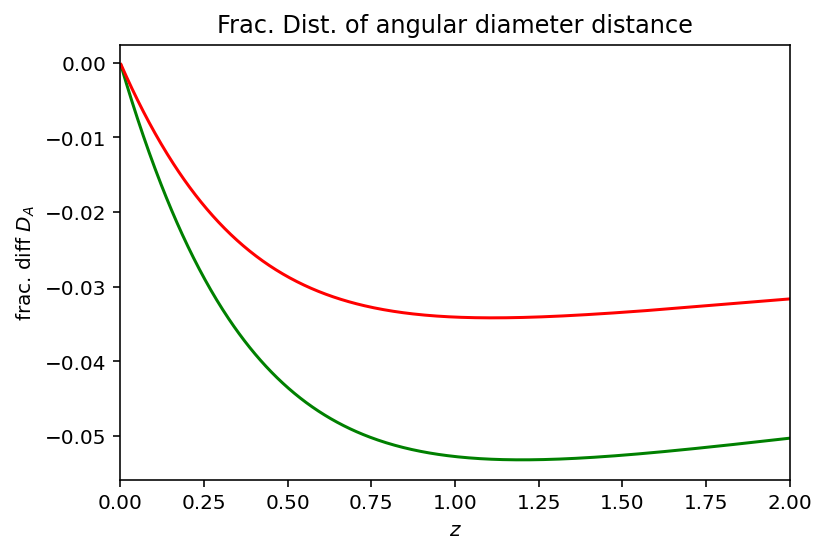

In [66]:
plt.plot(z, (DA2-DA)/DA, color='g')
plt.plot(z, (DA3-DA)/DA, color='r')
plt.xlabel('$z$')
plt.ylabel(r'frac. diff $D_A$')
plt.title('Frac. Dist. of angular diameter distance')
plt.xlim([0, 2]);

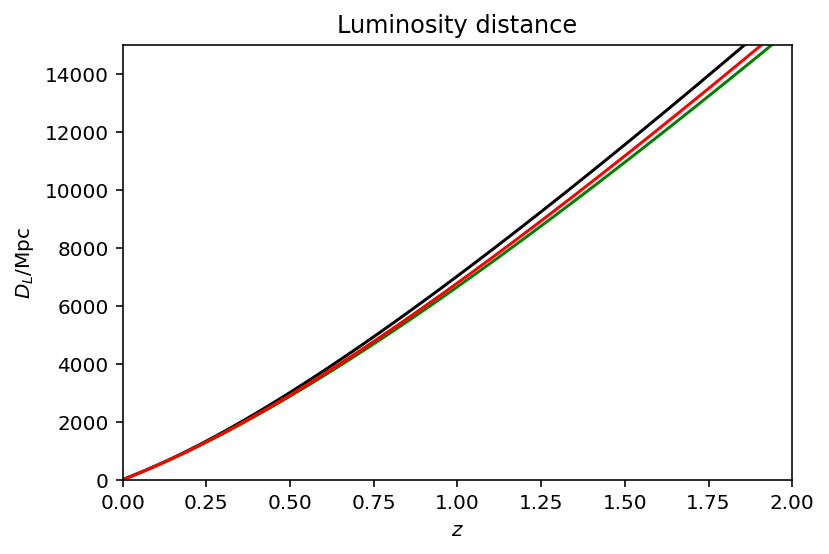

In [67]:
DL = DA * (1+z) * (1+z)
DL2 = DA2 * (1+z) * (1+z)
DL3 = DA3 * (1+z) * (1+z)
plt.plot(z, DL, color='k')
plt.plot(z, DL2, color='g')
plt.plot(z, DL3, color='r')
plt.xlabel('$z$')
plt.ylabel(r'$D_L /\rm{Mpc}$')
plt.title('Luminosity distance')
plt.ylim([0,15000])
plt.xlim([0,2]);

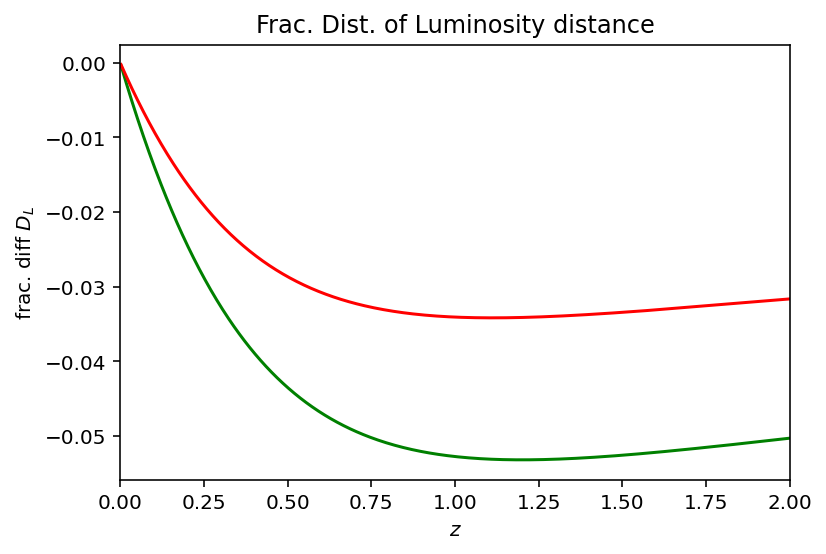

In [68]:
plt.plot(z, (DL2-DL)/DL, color='g')
plt.plot(z, (DL3-DL)/DL, color='r')
plt.xlabel('$z$')
plt.ylabel(r'frac. diff $D_L$')
plt.title('Frac. Dist. of Luminosity distance')
plt.xlim([0, 2]);